In [35]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [36]:
cricket =pd.read_csv('cricket.csv')
cricket.head()

,ID,Player,Country,Last Year Played,Matches,Innings,No Outs,Runs,Average,Balls_Faced,Strike_Rate
0,1,Shoaib Malik,PAK,2019,111,104,30,2263,30.58,1824,124.06
1,2,RG Sharma,INDIA,2019,104,96,14,2633,32.10,1905,138.21
2,3,Shahid Afridi,PAK,2018,99,91,12,1416,17.92,944,150.00
3,4,MS Dhoni,INDIA,2019,98,85,42,1617,37.60,1282,126.13
4,5,LRPL Taylor,NZ,2019,95,87,19,1743,25.63,1430,121.88


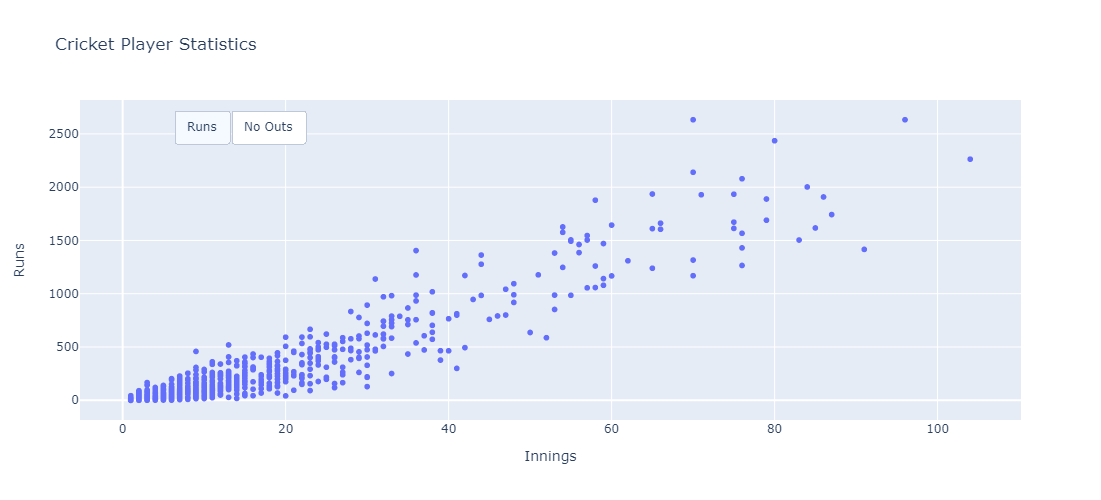

In [37]:
fig1 = px.scatter(cricket,\
                  x = "Innings",\
                  y = "Runs",\
                  hover_name = "Player",\
                  # labels = {'Runs': 'Runs'},
                  hover_data = ["Average", "Country"],\
                  height = 500,\
                  title = "Cricket Player Statistics")

button1 = {'method': 'update',
          'label': 'Runs',
          'args': [
              {'y': [cricket['Runs']]},
              {'yaxis.title': 'Runs'}]
          }

button2 = {'method': 'update',
          'label': 'No Outs',
          'args': [
              {'y': [cricket['No Outs']]},
              {'yaxis.title': 'No Outs'}]
          }

fig1.update_layout(
    updatemenus=[{
        'type': 'buttons',
        'direction': "left",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 0.1,
        'xanchor': "left",
        'y': 1,
        'yanchor': "top",
        'buttons': [button1, button2]
    }]
)

fig1.show()

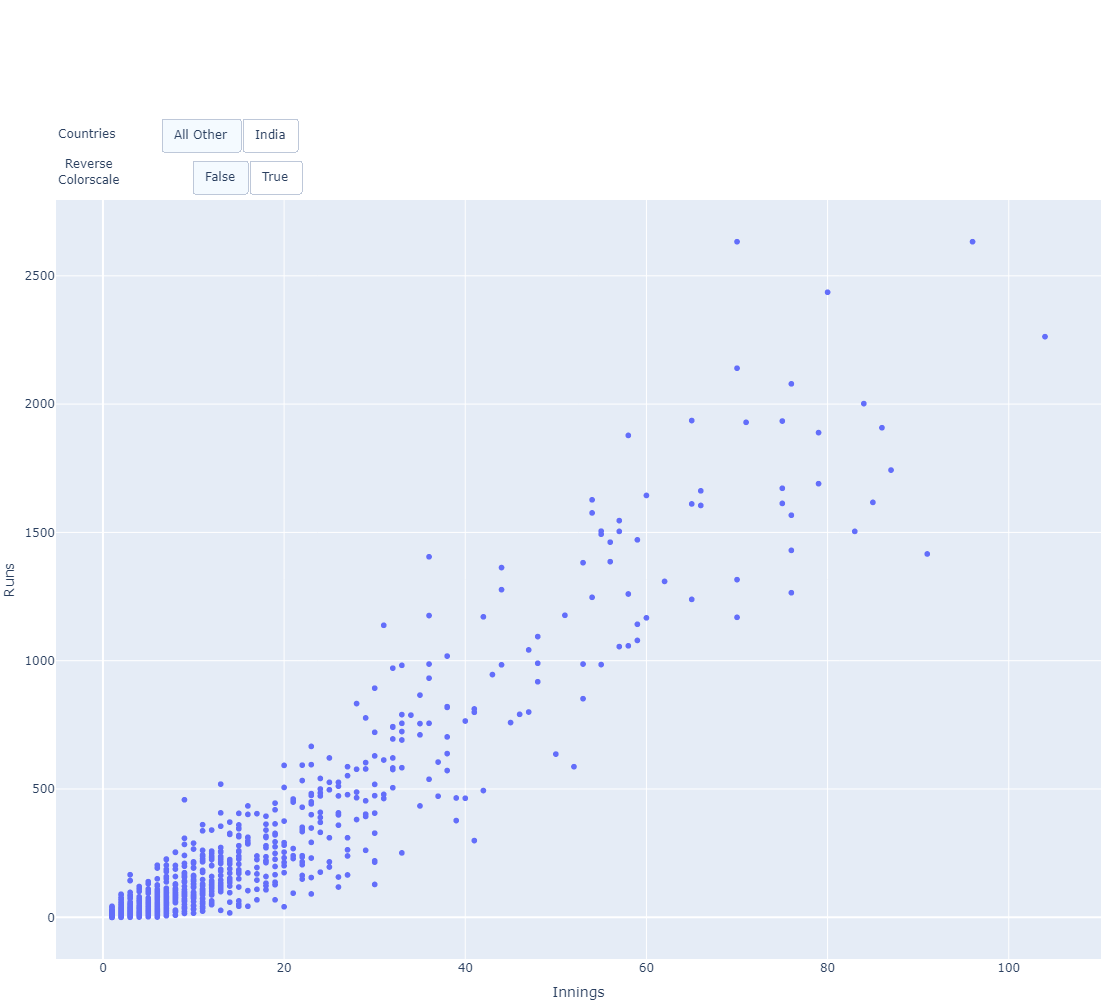

In [59]:
fig2 = go.Figure()

# Add surface trace
fig2 = px.scatter(cricket,\
                  x = "Innings",\
                  y = "Runs",\
                  hover_name = "Player",\
                  # labels = {'Runs': 'Runs'},
                  hover_data = ["Average", "Country"],\
                  height = 500)

# Update plot sizing
fig2.update_layout(
    width=800,
    height=1000,
    autosize=False,
    margin=dict(t=200, b=0, l=0, r=0),
)

# Update 3D scene options
fig2.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add drowdowns
# button_layer_1_height = 1.08
button_layer_1_height = 1.12
button_layer_2_height = 1.065

fig2.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["Countries", "All Other"],
                    label="All Other",
                    method="restyle"
                ),
                dict(
                    args=["Countries", "India"],
                    label="India",
                    method="restyle"
                ),
            ]),
            type = "buttons",
            direction="right",
            pad={"r": 9, "t": 9},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
        dict(
            buttons=list([
                dict(
                    args=["reversescale", False],
                    label="False",
                    method="restyle"
                ),
                dict(
                    args=["reversescale", True],
                    label="True",
                    method="restyle"
                )
            ]),
            type = "buttons",
            direction="right",
            pad={"r": 9, "t": 9},
            showactive=True,
            x=0.13,
            xanchor="left",
            y=button_layer_2_height,
            yanchor="top"
        ),
    ])

fig2.update_layout(
    annotations=[
        dict(text="Countries", x=0, xref="paper", y=1.1, yref="paper",
                             align="left", showarrow=False),
        dict(text="Reverse<br>Colorscale", x=0, xref="paper", y=1.06,
                             yref="paper", showarrow=False),
    ])

fig2.show()